<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные аггрегатора объявлений по продаже недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
#импортируем pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#запишем датафрейм в переменную df. В качестве разделителя здесь используется '\t' вместо классической запятой,
#поэтому применим аргумент sep
df = pd.read_csv('', sep='\t')
#посмотрим на него одним глазком
display(df.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Сразу бросается в глаза большое число пропусков в примерно половине столбцов. Наденем очки и посмотрим на эти данные поближе

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Действительно, пропусков очень много. В ряде случаев отсутствует информация о площади комнат. Часто - об окружающей инфраструктуре, высоте потолков и наличии балкона. О том, является ли недаижимость апартаментами - вообще 2775 записей из 23699. Оценим долю пропусков.

In [4]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Неутешительно. В причинах и характерах этих пропусков предстоит разобраться, а пока, достанем лупу и посмотрим на данные еще повинмательнее.

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Да тут еще и выбросы. Желаете квартиру площадью 900 м2? А повесить люстру на стометровый потолок? Если слишком высоко - есть метровый. А жилая площадь в два квадратных метра? Или кухня - 1.3 м2? Есть недвижимость на любой вкус и кошелек. Если смотреть на таблицу выше, можно заметить, что выбросы не сильно влияют на данные. Средняя не улетает в космос и в большинстве случаев не сильно отличается от медианы. Но отрицать их существование мы не можем.

Со всем разберемся и все поправим.


### Вывод

В данных имеется множество пропусков, в некоторых случаях доля доходит до 88%. Кроме пропусков, есть выбросы.

## Предобработка данных

Что же могло пойти не так, что мы имеем столько пропусков? Предлагаю рассмотреть причины и решить что с этим всем делать.


С большой долей вероятности, причиной части пропусков является то, что пользователи просто не указывают данный параметр. Среди таких можно выделить `living_area`, `kitchen_area`, `floors_total`, однако заменив их медианными значениями, мы рискуем иметь несоответствия с общей площадью, или этажом. Пока я заменил бы значения `floors_total` на максимальное, только потому что пропусков ничтожно мало. Остальные два столбца я бы просто не трогал.

Другая причина - отсутствие указанных параметров квартиры. Это означет, что пропуск в данных столбцах смело можно приравнять к нулю. Речь идет о `balcony`, `parks_around3000`, `ponds_around3000`. Подозреваю, что `is_apartment` тоже может относиться к этой категории. Заменим значения в `balcony`, `parks_around3000`, `ponds_around3000` и `is_apartment` на нули. Я бы `is_apartment` не трогал вообще, но когда я его буду превращать в булевое значение, все пропуски превратятся в True, а это чушь несусветная.

Есть ситуации, когда с автоматическим внесением данных что-то идет не так. Вероятно, это случилось с `parks_nearest`, `ponds_nearest`, `cityCenters_nearest`, `airports_nearest`. Все заменим на медиану, но учтем населенный пункт. 

Есть еще пропуски в `locality_name`. Вряд ли когда создавали форму, решили разрешить оставлять это поле пустым, поэтому сочтем это технической ошибкой, а учитывая ничтожно малое количество строк с отсутствием значения в этом столбце, без сожаления от них избавимся.

Поехали!

In [6]:
#используем поплавки для 'days_exposition'
df['days_exposition'] = df['days_exposition'].fillna(0)
#сходу займемся аннигиляцией строк с пропущенным 'locality_name'
df = df.dropna(subset=['locality_name'])
#пропуски в `floors_total` заменим на максимальное значение
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].max())
#у следующей тройки игроков обнулим пропуски.
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
#разберемся с is_apartment
df['is_apartment'] = df['is_apartment'].astype('float')
df['is_apartment'] = df['is_apartment'].fillna(0)
df['is_apartment'] = df['is_apartment'].astype('bool')
#теперь заменим на медиану пропуски в расстояниях до ключевых мест с группировкой по населенному пункту
df['parks_nearest'] = df['parks_nearest'].fillna(df.groupby('locality_name')['parks_nearest'].transform("median"))
df['ponds_nearest'] = df['ponds_nearest'].fillna(df.groupby('locality_name')['ponds_nearest'].transform("median"))
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df.groupby('locality_name')['cityCenters_nearest'].transform("median"))
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform("median"))
#проверим, все ли нам удалось заполнить
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18264 non-null float64
cityCenters_nearest     18264 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           17652 non-null float64
ponds_around300

Кажется, в наших геоданных многие значения были изменены, но не все. Вероятно, есть населенные пункты, для которых не было указано данных значений совсем, а значит и медианное значение вычислить нельзя. Проверим так ли это

In [7]:
df.groupby('locality_name').agg({'parks_nearest': ['min', 'max', 'median', 'count']})

parks_nearest                 
                               min max median count
locality_name                                      
Бокситогорск                   NaN NaN    NaN     0
Волосово                       NaN NaN    NaN     0
Волхов                         NaN NaN    NaN     0
Всеволожск                     NaN NaN    NaN     0
Выборг                         NaN NaN    NaN     0
...                            ...  ..    ...   ...
село Путилово                  NaN NaN    NaN     0
село Рождествено               NaN NaN    NaN     0
село Русско-Высоцкое           NaN NaN    NaN     0
село Старая Ладога             NaN NaN    NaN     0
село Шум                       NaN NaN    NaN     0

[364 rows x 4 columns]

Что и требовалось доказать. 

Что смогли заполнили, остальное оставим как есть. Удалять не будем, чтобы не потерять более ценные данные, как и не будем дальше заполнять пропуски, чтобы совсем уж не искажать таблицу.

Время для замены типов данных. Все замены типов, кроме одной будут косметическими. Лишь перевод данных в столбце `first_day_exposition` из object в datetime будет иметь практический смысл. Но начнем мы с превращения дробных чисел в целые.

Превратим в целые числа значение в следующих столбцах:

* `last_price`, потому что имеющиеся данные говорят о том, что после точки везде нули;

* `floors_total`, потому что количество этажей должно быть целым числом;

* `balcony`, потому что девять и три четверти бывает только платформа;

* `days_exposition`, потому что удобно работать с полными днями.

In [8]:
#реализуем задуманное
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
#полюбуемся результатами
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null int64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18264 non-null float64
cityCenters_nearest     18264 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           17652 non-null float64
ponds_around3000     

Теперь займемся делом. Воспользуемся методом to_datetime и превратим кошмарные данные с нулевым временем в опрятные даты.

In [9]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,584.5,81
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Красивое

Проверим на явные дубликаты еще что ли. На всякий случай.

In [10]:
df.duplicated().sum()

0

Ура, одной проблемой меньше.

### Вывод

Почти все пропуски заполнены, там, где это возможно, не вредя данным. Исправлены типы данных по некоторым столбцам

## Расчёты и добавление результатов в таблицу

Пора добавить расчитать несколько полезных значений и добавить столбцы с новыми данными:
* цену квадратного метра поместим в `sqm_price`;
* день недели, месяц и год публикации объявления - `weekday`, `month`, `year`;
* этаж квартиры; варианты — первый, последний, другой - `floortype` и `floortype_id`(0 - первый, 1 - другой, 2 - последний);
* соотношение жилой и общей площади, а также отношение площади кухни к общей - `living_to_total` и `kitchen_to_total` соответственно.

Начинаем с цены за квадратный метр

In [11]:
df['sqm_price'] = df['last_price'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.370370
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,584.5,81,82920.792079
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000


Готово, теперь добавим `weekday`, `month` и `year`

In [12]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
#проверяем
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,584.5,81,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018


Получилось! Беремся за `floortype`

In [13]:
#создадим функцию для категоризации по типам этажей
def floortype_adding(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'
#применим ее
df['floortype'] = df.apply(floortype_adding, axis=1)
#проверим как все прошло
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floortype
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,0,120370.370370,3,3,2019,Другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,0.0,584.5,81,82920.792079,1,12,2018,Первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015,Другой
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424,408176.100629,4,7,2015,Другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,Другой


In [14]:
#сделаем еще столбец с floortype_id, вангую пригодится
def floortype_idiing(row):
    if row['floortype'] == 'Первый':
        return 0
    if row['floortype'] == 'Последний':
        return 2
    return 1
#применим ее
df['floortype_id'] = df.apply(floortype_idiing, axis=1)
#проверим как все прошло
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floortype,floortype_id
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,0,120370.370370,3,3,2019,Другой,1
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,584.5,81,82920.792079,1,12,2018,Первый,0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558,92785.714286,3,8,2015,Другой,1
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424,408176.100629,4,7,2015,Другой,1
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121,100000.000000,1,6,2018,Другой,1


Вуху, пора исследовать отношения площадей!

In [15]:
#отношение и отношение
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']
#чекаем результат
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floortype,floortype_id,living_to_total,kitchen_to_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,755.0,0,120370.370370,3,3,2019,Другой,1,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,584.5,81,82920.792079,1,12,2018,Первый,0,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,574.0,558,92785.714286,3,8,2015,Другой,1,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,234.0,424,408176.100629,4,7,2015,Другой,1,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48.0,121,100000.000000,1,6,2018,Другой,1,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,55,95065.789474,0,9,2018,Другой,1,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,593.0,155,99195.710456,3,11,2017,Другой,1,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,503.0,0,110544.692737,3,4,2019,Другой,1,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,NaN,189,87454.764777,2,5,2018,Другой,1,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,503.0,289,88524.590164,6,2,2017,Другой,1,0.714754,0.106557


Все получилось. Если значений площади не было, не появились новые значения и в столбцах с отношениями. Воспользовались всем имеющимися данными, не внося неточностей в таблицу

### Вывод

Добавили информацию:
* с ценой квадратного метра;
* днем недели, месяцем и годом публикации объявления;
* типами этажей квартиры;
* соотношением жилой и общей площади, а также отношением площади кухни к общей.

## Исследовательский анализ данных

Приступим к анализу! 

Изучим параметры: 
* площадь
* цена
* число комнат
* высота потолков

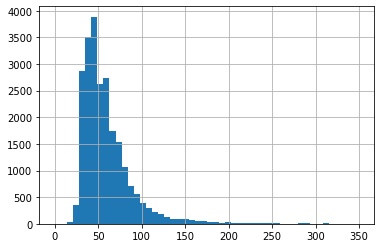

In [16]:
#сначала построем гисторграмму площади
df['total_area'].hist(bins=50, range=(0,350))

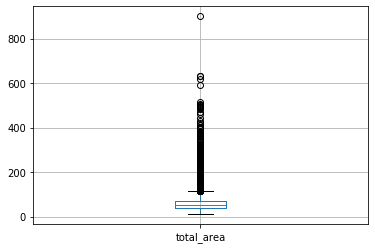

In [17]:
#выглядит не очень, посмотрим на выбросы при помощи boxplot()
df.boxplot(column='total_area')

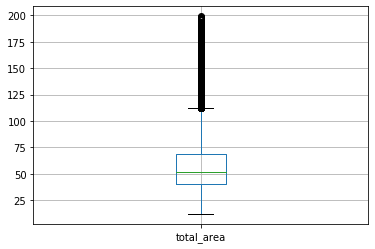

In [18]:
#плохо видно, настроим увеличение
df.query('total_area < 200').boxplot(column='total_area')

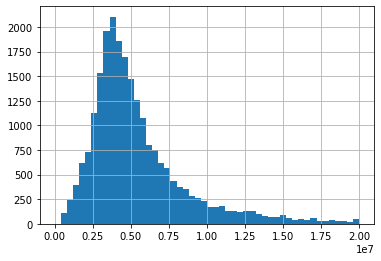

In [19]:
#теперь посмотрим на цену
df['last_price'].hist(bins=50, range=(0,20000000))

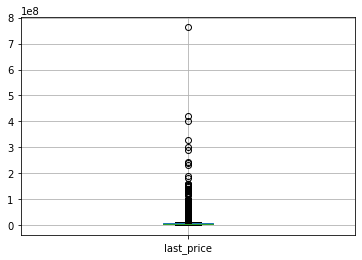

In [20]:
#здесь все выглядит еще хуже
df.boxplot(column='last_price')

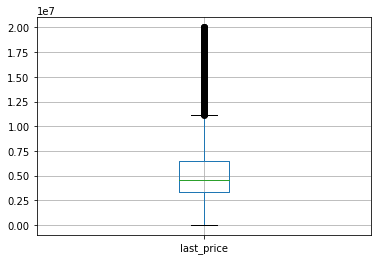

In [21]:
#давайте укрупним до 20 млн
df.query('last_price < 20000000').boxplot(column='last_price')

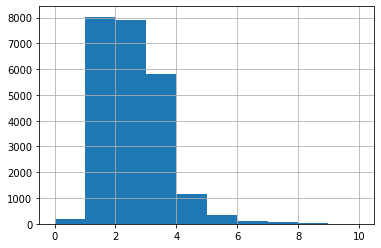

In [22]:
#гистограмма количества комнат
df['rooms'].hist(bins=10, range=(0,10))

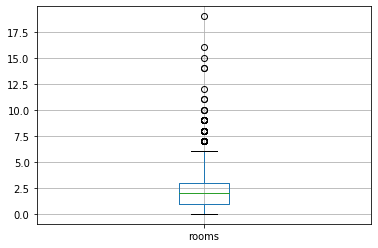

In [23]:
#посмотрим на выбросы
df.boxplot(column='rooms')

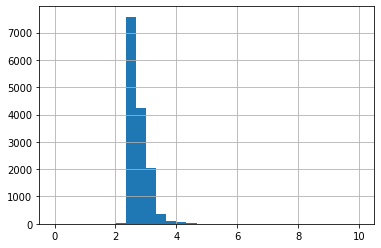

In [24]:
#гистограмма высоты потолков
df['ceiling_height'].hist(bins=30, range=(0,10))

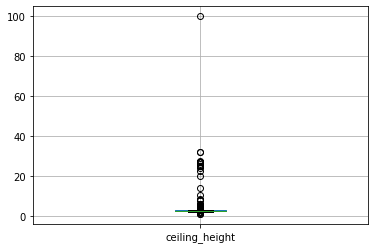

In [25]:
#лучше не станет
df.boxplot(column='ceiling_height')

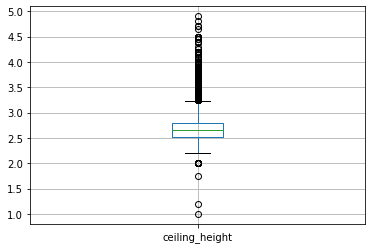

In [26]:
#укрупним до 5 метровых потолков
df.query('ceiling_height < 5').boxplot(column='ceiling_height')

Графики выглядят пустовато из-за наличия сильно выдающихся значений. Еще в самом начале, при использовании метода `describe()`, были видны выбросы. Гистограмма же подтвердила, что их немного, а ящик с усами показал адекватные значения. Посмотрим, что мы выявили:
* площади основной массы квартир не превышают 115 кв. м., однако есть выбивающиеся значения - до 900 кв. м. 50% квартир имеют площадь от 40 до 70 кв. м.;
* основная часть квартир стоит не более 12 миллионов денег, но за 800 миллионов тоже есть;
* большая часть квартир имеет до шести комнат, но много значений и до восьми. Имеются выбросы до 19 комнат. Половина от всех квартир имеюю от одной до трех комнат;
* высота потолков в большинстве своем от 2.4 до 3 метров, но встречается и один, и двадцать, и тридцать, и сто.


Теперь посмотрим на скорость продажи

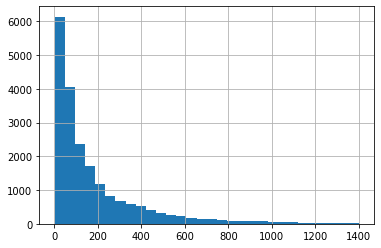

In [27]:
#построим гисторграмму
df['days_exposition'].hist(bins=30, range=(1,1400))

In [28]:
#посчитаем среднее и медиану
print('среднее время продажи', df['days_exposition'].mean(), 'дней')
print('медианное время продажи', df['days_exposition'].median(), 'дней')

среднее время продажи 156.4489640591966 дней
медианное время продажи 73.0 дней


Большей части людей потребовалось менее года на продажу, однако есть и те, чье жилище было продано через четыре года. В среднем требуется 156 дней, однако медиана говорит о том, что половина людей управилсь в два раза быстрее - за 73 дней. 

Построим ящик с усами и посмотрим на выдающиеся значения.

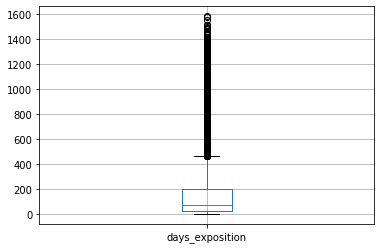

In [29]:
df.boxplot(column='days_exposition')

Из этого графика видно, что продажи за несколько суток не являются чем-то выдающимся и довольно распространены, чего нельзя сказать о случаях, когда объявление висит более 420-450 дней. Это необычно долго и похоже на выброс. Примененная ранее диаграмма  это подтверждает

По горячим следам обрежем таблицу устранив выбросы и сохраним в новой переменной `df_cropped`

In [30]:
df_cropped = df.query('total_area <= 115 and last_price <= 12000000 and rooms <= 6').reset_index(drop=True)

In [31]:
df_cropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21522 entries, 0 to 21521
Data columns (total 30 columns):
total_images            21522 non-null int64
last_price              21522 non-null int64
total_area              21522 non-null float64
first_day_exposition    21522 non-null datetime64[ns]
rooms                   21522 non-null int64
ceiling_height          13031 non-null float64
floors_total            21522 non-null int64
living_area             19849 non-null float64
floor                   21522 non-null int64
is_apartment            21522 non-null bool
studio                  21522 non-null bool
open_plan               21522 non-null bool
kitchen_area            19459 non-null float64
balcony                 21522 non-null int64
locality_name           21522 non-null object
airports_nearest        16169 non-null float64
cityCenters_nearest     16169 non-null float64
parks_around3000        21522 non-null float64
parks_nearest           15564 non-null float64
ponds_around3

In [32]:
### Код ревьювера ###

len(df_cropped)/23699

0.9081395839486898

Таблица немного похудела, но это ей на пользу.

Теперь изучим какие факторы влияют на стоимость квартиры сильнее всего. Начнем с проверки зависимости цены от площади, числа комнат, удалённости от центра.

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.392509 -0.044295   -0.113981
last_price                     -0.392509    1.000000  0.362361    0.647617
rooms                          -0.044295    0.362361  1.000000    0.796151
total_area                     -0.113981    0.647617  0.796151    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe327f5e8d0>,
      dtype=object)

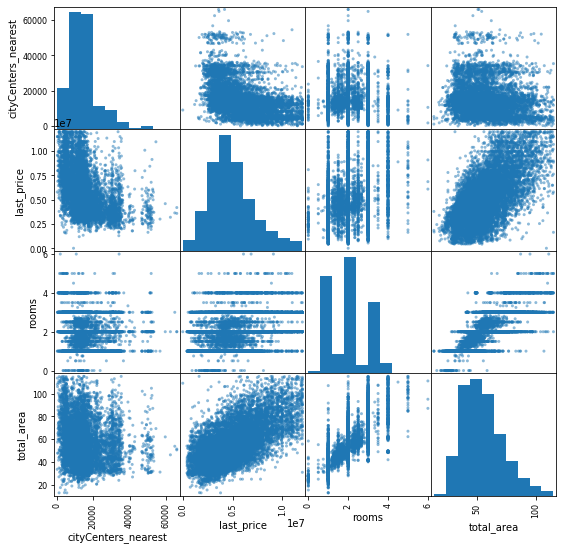

In [33]:
#создадим сводную таблицу в переменной df_benefits
df_benefits = df_cropped.pivot_table(index='sqm_price', values=['last_price', 'total_area', 'rooms', 'cityCenters_nearest'])
#построим матрицу корреляции
print(df_benefits.corr())
#и матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(df_benefits, figsize=(9, 9))

Сильнее всего на стоимость квартиры влияет ее общая площадь. Зависимость между количеством комнат и стоимостью, а также расстоянием до центра и стоимостью едва прослеживается.

Теперь узнаем, зависит ли стоимость от даты размещения: дня недели, месяца и года. Диаграмму строить не будем, цифры скажут обо всем.

In [34]:
#создадим сводную таблицу в переменной df_timeline
df_timeline = df_cropped.pivot_table(index='sqm_price', values=['last_price', 'weekday', 'month', 'year'])
#построим матрицу корреляции
df_timeline.corr()

,last_price,month,weekday,year
last_price,1.000000,0.012949,-0.021508,0.007810
month,0.012949,1.000000,0.009627,-0.280577
weekday,-0.021508,0.009627,1.000000,-0.004709
year,0.007810,-0.280577,-0.004709,1.000000


Стоимость квартиры имеет слабую линейную зависимость от даты выставления объявления, однако среди трех рассматриваемых параметров, год оказывает набольшее влияние.

Нас не просят, но проверим зависимость от других параметров, почему бы и нет. Начнем с высоты потолка, количества балконов, этажа, и отношений площадей

In [35]:
df_benefits2 = df_cropped.pivot_table(index='sqm_price', values=['last_price', 'ceiling_height', 'balcony', 'floortype_id', 'living_to_total', 'kitchen_to_total'])
df_benefits2.corr()

,balcony,ceiling_height,floortype_id,kitchen_to_total,last_price,living_to_total
balcony,1.000000,0.020491,0.067364,0.028269,0.073506,-0.063335
ceiling_height,0.020491,1.000000,0.009263,0.023238,0.135595,-0.017090
floortype_id,0.067364,0.009263,1.000000,0.013502,0.054204,-0.009047
kitchen_to_total,0.028269,0.023238,0.013502,1.000000,-0.045700,-0.745203
last_price,0.073506,0.135595,0.054204,-0.045700,1.000000,-0.034144
living_to_total,-0.063335,-0.017090,-0.009047,-0.745203,-0.034144,1.000000


Высота потолков влияет наиболее сильно.

Проверим на влияние геолокации на цену.

In [36]:
df_geo_benefits = df_cropped.pivot_table(index='sqm_price', values=['last_price', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'airports_nearest'])
df_geo_benefits.corr()

,airports_nearest,last_price,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
airports_nearest,1.000000,-0.056181,-0.004852,-0.019875,-0.058399,0.022624
last_price,-0.056181,1.000000,0.302903,0.066164,0.339687,-0.023622
parks_around3000,-0.004852,0.302903,1.000000,-0.058991,0.377323,-0.094141
parks_nearest,-0.019875,0.066164,-0.058991,1.000000,0.076624,0.018335
ponds_around3000,-0.058399,0.339687,0.377323,0.076624,1.000000,-0.131612
ponds_nearest,0.022624,-0.023622,-0.094141,0.018335,-0.131612,1.000000


Кроме ранее выявленной зависимости от центра, на стоимость незначительно влияет наличие поблизости парков и прудов.

А влияет ли тип недвижимости на стоимость?

In [37]:
df_realty_type = df_cropped.pivot_table(index='sqm_price', values=['last_price', 'is_apartment', 'studio', 'open_plan'])
df_realty_type.corr()

,is_apartment,last_price,open_plan,studio
is_apartment,1.000000,0.012103,-0.002188,-0.003654
last_price,0.012103,1.000000,-0.026499,-0.054623
open_plan,-0.002188,-0.026499,1.000000,-0.004254
studio,-0.003654,-0.054623,-0.004254,1.000000


Почти не влияет.

В сухом остатке, на стоимость квартиры в значительной степени влияет ее площадь, расстояние до центра, и немного наличие балконов и аэропорта в доступе. Остальные параметры имеют довольно слабую линейную свзяь со стоимостью.

Двигаемся дальше!

Определим 10 городов с наибольшим количеством объявлений.

In [39]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Открывает список, очевидно, Санкт-Петербург, закрывет Выборг. Топ-10 городов определены, теперь посмотрим их рейтинг стоимости квадратного метра.

In [40]:
#выделим в отдельную переменную сводную таблицу по населенным пунктам, средней стоимости квадрата в них и количеству объявлений
df_locality = df.pivot_table(index='locality_name', values='sqm_price', aggfunc=['mean', 'count'])
#переименуем столбцы в одноуровневые
df_locality.columns = ['mean_sqm_price', 'count']
#выделим топ-10 городов по кол-ву объявлений
df_locality_10 = df_locality.query('count >= 237')
#отсортируем по возрастанию цены
df_locality_10.sort_values(by='mean_sqm_price', ascending=False)

,mean_sqm_price,count
locality_name,,
Санкт-Петербург,114849.008794,15721
Пушкин,103125.819291,369
деревня Кудрово,92473.547576,299
посёлок Парголово,90175.913458,327
посёлок Мурино,85752.189195,522
посёлок Шушары,78677.364217,440
Колпино,75424.579098,338
Гатчина,68746.146763,307
Всеволожск,68654.473986,398


Санкт-Петербург по-прежнему в лидерах, а Выборг на том же 10-м месте со средней стоимостьюжилья вдвое меньшей, чем в столице региона.

Теперь разберемся с квартирами в центре Питера, и посмотрим как различаются цены на них в зависимости от удаленности от центра.

In [41]:
#отфильтруем по городу
spb_realty = df.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
#добавим новый столбец
spb_realty['km_to_center'] = round(spb_realty['cityCenters_nearest'] / 1000)
#проверим
spb_realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,sqm_price,weekday,month,year,floortype,floortype_id,living_to_total,kitchen_to_total,km_to_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,120370.370370,3,3,2019,Другой,1,0.472222,0.231481,16.0
1,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,558,92785.714286,3,8,2015,Другой,1,0.612500,0.148214,14.0
2,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,424,408176.100629,4,7,2015,Другой,1,NaN,NaN,7.0
3,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121,100000.000000,1,6,2018,Другой,1,0.320000,0.410000,8.0
4,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,False,...,0,110544.692737,3,4,2019,Другой,1,NaN,0.263966,12.0


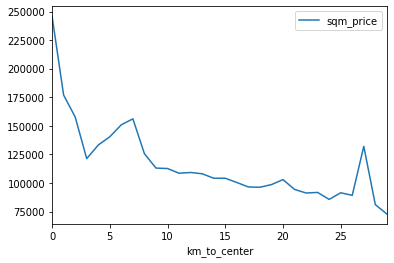

In [42]:
#создадим свой маленький датафрейм
spb_center_importance = spb_realty.pivot_table(index='km_to_center', values='sqm_price')
#построим график
spb_center_importance.plot()

Чем ближе к центру, тем выше цена. Этот вывод действует на первых двух километрах от центра. Далее в ход, вероятно, идут другие факторы, заставляющие цену то подниматься, то опускаться, но в целом, сохраняя тенденцию к ее снижению в зависимости от удаления от центра.

Теперь сузим наш обзор до двухкилометрового радиуса и посмотрим, какие правила действуют в центре Питера при формировании цены квадратного метра жилья.

In [43]:
#продолжим расчлененку
spb_center = spb_realty.query('km_to_center <= 7').reset_index(drop=True)
#сколько же осталось значений
spb_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 31 columns):
total_images            3525 non-null int64
last_price              3525 non-null int64
total_area              3525 non-null float64
first_day_exposition    3525 non-null datetime64[ns]
rooms                   3525 non-null int64
ceiling_height          2286 non-null float64
floors_total            3525 non-null int64
living_area             3227 non-null float64
floor                   3525 non-null int64
is_apartment            3525 non-null bool
studio                  3525 non-null bool
open_plan               3525 non-null bool
kitchen_area            3187 non-null float64
balcony                 3525 non-null int64
locality_name           3525 non-null object
airports_nearest        3525 non-null float64
cityCenters_nearest     3525 non-null float64
parks_around3000        3525 non-null float64
parks_nearest           3525 non-null float64
ponds_around3000        3525 non-n

Изучим разнообразие жилых прощадей

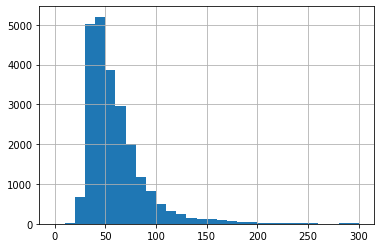

In [44]:
df['total_area'].hist(bins=30, range=(0,300))

Соответствует общеобластному.

А диапазон цен?

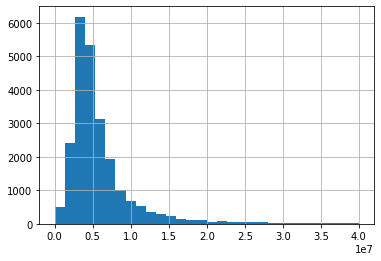

In [45]:
df['last_price'].hist(bins=30, range=(1,40000000))

На любой кошелек есть жилплощадь.

Больше двушек, или однушек? а может есть шестикомнатные?

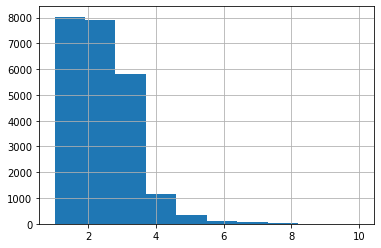

In [46]:
df['rooms'].hist(range=(1,10))

Есть и восьмикомнатные.

А как дела с высотой потолков?

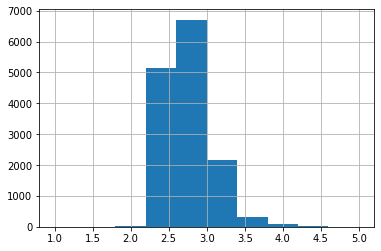

In [47]:
df['ceiling_height'].hist(range=(1,5))

Довольно обыденно

Посмотрим что влияет на ценообразование в центре солевой столицы

In [48]:
#сначала рассмотрим зависимость цены от площади, количества комнат и высоты потолков
center_benefits = spb_center.pivot_table(index='sqm_price', values=['last_price', 'total_area', 'rooms', 'ceiling_height'])
center_benefits.corr()

,ceiling_height,last_price,rooms,total_area
ceiling_height,1.000000,0.121567,0.128054,0.173155
last_price,0.121567,1.000000,0.306776,0.607492
rooms,0.128054,0.306776,1.000000,0.724716
total_area,0.173155,0.607492,0.724716,1.000000


Как и ранее, наибольшее влияние на цену оказывает ее площадь. Количество комнат имеет незначительное влияние, а высота потолков никого особо не интересует, а зря.

Посмотрим на влияние геолокации на стоимость недвижимости

In [49]:
center_geo_benefits = spb_center.pivot_table(index='sqm_price', values=['last_price', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'airports_nearest'])
center_geo_benefits.corr()

,airports_nearest,cityCenters_nearest,last_price,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
airports_nearest,1.000000,0.384513,0.101284,0.006907,-0.009946,0.066479,0.046442
cityCenters_nearest,0.384513,1.000000,-0.039775,-0.202682,0.052687,-0.283231,0.239921
last_price,0.101284,-0.039775,1.000000,0.126549,-0.041980,0.108026,-0.080155
parks_around3000,0.006907,-0.202682,0.126549,1.000000,-0.171826,0.161289,-0.163687
parks_nearest,-0.009946,0.052687,-0.041980,-0.171826,1.000000,-0.020713,0.059161
ponds_around3000,0.066479,-0.283231,0.108026,0.161289,-0.020713,1.000000,-0.324869
ponds_nearest,0.046442,0.239921,-0.080155,-0.163687,0.059161,-0.324869,1.000000


Для людей в центре не имеет значения, насколько они центрее, и вежливо игнорируют пруды, парки и аэропорты

Может дата загрузки объявления имеет значение?

In [50]:
center_timeline = spb_center.pivot_table(index='sqm_price', values=['last_price', 'weekday', 'month', 'year'])
center_timeline.corr()

,last_price,month,weekday,year
last_price,1.000000,-0.012287,0.030684,-0.046519
month,-0.012287,1.000000,0.019856,-0.245771
weekday,0.030684,0.019856,1.000000,0.005454
year,-0.046519,-0.245771,0.005454,1.000000


Цена квартиры в центре высока всегда и в среду 2014 года и в понедельник 2019 года.

Проверим влияние балконов, этажа, и отношений жилой площади или кухни к общей.

In [51]:
center_benefits2 = spb_center.pivot_table(index='sqm_price', values=['last_price', 'balcony', 'floortype_id', 'living_to_total', 'kitchen_to_total'])
center_benefits2.corr()

,balcony,floortype_id,kitchen_to_total,last_price,living_to_total
balcony,1.000000,0.042042,0.097942,0.071395,-0.158994
floortype_id,0.042042,1.000000,-0.070275,0.095933,0.052918
kitchen_to_total,0.097942,-0.070275,1.000000,-0.085858,-0.669821
last_price,0.071395,0.095933,-0.085858,1.000000,-0.016069
living_to_total,-0.158994,0.052918,-0.669821,-0.016069,1.000000


Явной зависимости нет

Осталось проверить, влияет ли на цену тип помещения и планировки.

In [52]:
center_realty_type = spb_center.pivot_table(index='sqm_price', values=['last_price', 'is_apartment', 'studio', 'open_plan'])
center_realty_type.corr()

,is_apartment,last_price,open_plan,studio
is_apartment,1.000000,0.044481,-0.002798,-0.004092
last_price,0.044481,1.000000,0.017820,-0.024239
open_plan,-0.002798,0.017820,1.000000,-0.002923
studio,-0.004092,-0.024239,-0.002923,1.000000


Не влияет!

А теперь посмотрим на основные зависмости через диаграммы рассеяния вместо всех этих скучных цифр.

Представляю вашему вниманию зависимость цены от площади:

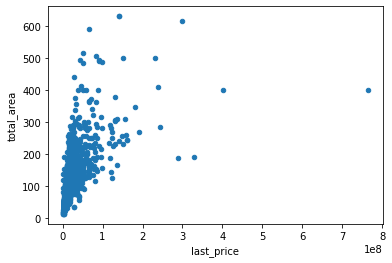

In [53]:
spb_center.plot(x='last_price', y='total_area', kind='scatter')

Теперь зависимость цены от количества комнат

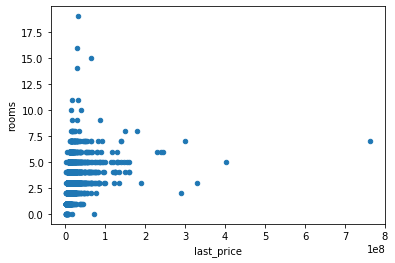

In [54]:
spb_center.plot(x='last_price', y='rooms', kind='scatter')

Не то, чтобы совсем явно, но определнный тренд есть.

### Вывод

Сравнивая данные среди жителей центра и в целом по области, можно однозначно сказать об одинаковом влиянии площади квартиры на ее стоимость, а также количества комнат. Было бы странно, если бы такой зависимости не было. В остальном, параметры, влияющие на стоимость квартир из центра Питера, отличаются от общеобластных. Так, для региона в целом, полезно иметь квартиру в центре города и обратить внимание на высоту потолков, а также наличие парков и водоемов поблизости.

## Общий вывод

В ходе исследования были предобработаны данные таблицы с информацией о недвижимости, произведены вычисления необходимых параметров и проведен исследовательский анализ влияния тех или иных параметров на стоимость квартир в Ленинградской области в целом и в центре Сантк-Петербурга.

Так для Ленинградской области наибольшее влияние на стоимость квартиры оказывает:
* площадь квартиры;
* количество комнат;
* высота потолков;
* расстояние от центра города;
* наличие парков поблизости;
* наличие водоемов поблизости.

В центре Петербурга на стоимость квартиры оказывает влияние:
* площадь квартиры;
* количество комнат.